# Analysis Report of the Various Audio Features in Spotify Music

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
g = pd.read_csv('genres_v2.csv', low_memory=False)
g_df = pd.DataFrame(g)

In [3]:
g_df.drop('Unnamed: 0', inplace = True, axis = 1)

In [4]:
corr_d_df = g_df.corr()

In [5]:
audio_feature_list = ['danceability', 'energy', 'acousticness', 'valence']
audio_feature_color_list = ['red', 'blue', 'grey', 'green']

In [6]:
lk_values = ['loudness', 'key']

In [7]:
lk_df = g_df.melt(id_vars = ['genre', 'mode'], value_vars = ['loudness', 'key'])

In [8]:
genre_list = ['Pop', 'trance', 'Underground Rap']

In [9]:
genre_group = g_df[['danceability', 'energy', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'genre']]
genre_group = genre_group.melt(id_vars = 'genre', value_vars = ['danceability', 'energy', 'speechiness', 'acousticness' ,'instrumentalness', 'liveness', 'valence']).reset_index()

__Please see heatmap to discover the correlations among the varying audio features. The stronger the color, the stronger the correlation.__

__Loudness/Energy and Instrumentalism/Duration_MS, and  have the strongest correlations of 0.6. This indicates that music that is loud will be energizing. Also, that instrumental music will generally have long durations.__

__Acousticness/Energy, also have the second strongest correlation seen in this map of 0.5. This is an indicator that acoustic music will also contain a lot of energy.__

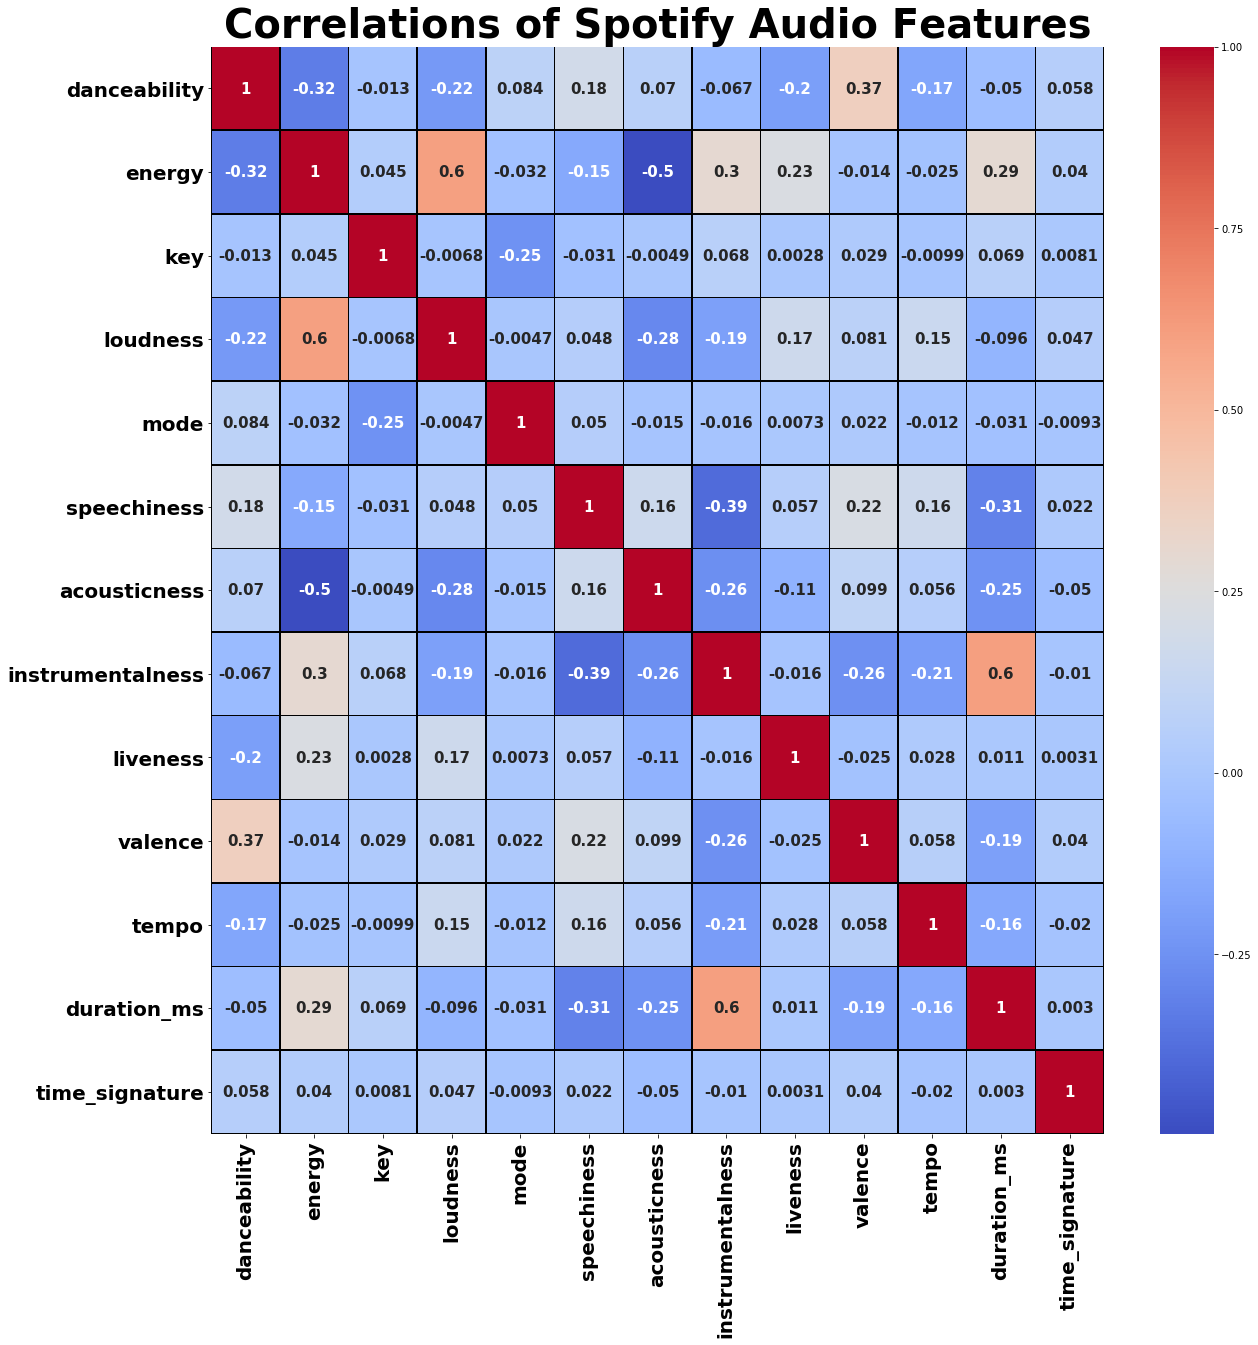

In [10]:
fig = plt.figure(figsize=(20,20))
x = sns.heatmap(corr_d_df, annot = True, linewidth = .5, linecolor = 'black', cmap = 'coolwarm', annot_kws = {"size": 15, "weight": 'bold'})
x.set_ylim(sorted(x.get_xlim(), reverse=True))
plt.title('Correlations of Spotify Audio Features', fontsize = 40, weight = 'bold')
plt.xticks(fontsize = 20, weight = 'bold')
plt.yticks(fontsize = 20, weight = 'bold', rotation = 0)
plt.show()

__The following are distribution plots displaying the frequency distribution among audio features.__

__These are four audio features that have been rated from a 0.0 to 1.0 scale.__

__For the audio feature danceability, the rating of 0.8 appears the most frequently.__

__For the audio feature energy, the most frequent rating is 0.98. It shows that the preference is for music to be highly energizing.__

__For the audio feature acousticness, most songs have a low rating, indicating a high level of acousticness isn't the preference in Spotify music. This shows that the prominent preference in music, is to contain lyrics.__

__For the audio feature valence, most of the songs are distributed from the rating 0.04 to 0.20; afterwards, sloping downwards. This indicates that most of the music feature more negative emotions (e.g. sad, depressed, angry), rather than positive emotions (e.g. happy, joy, excitement).__ 

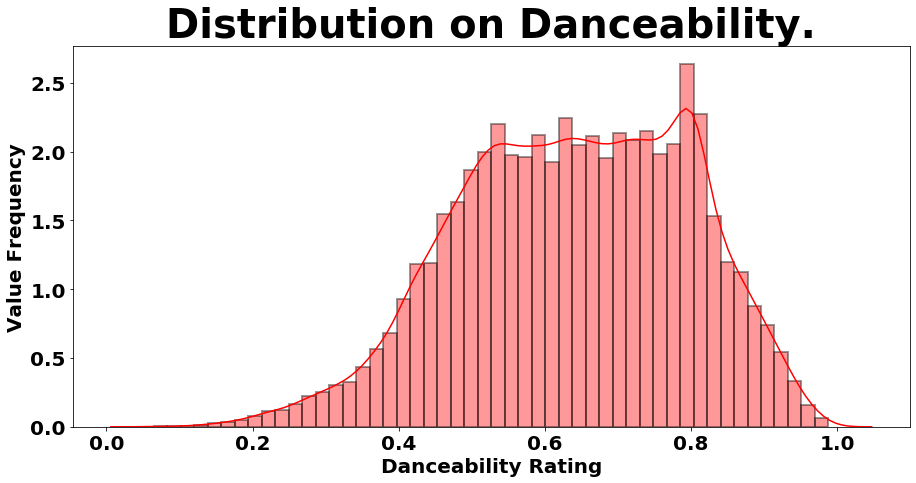

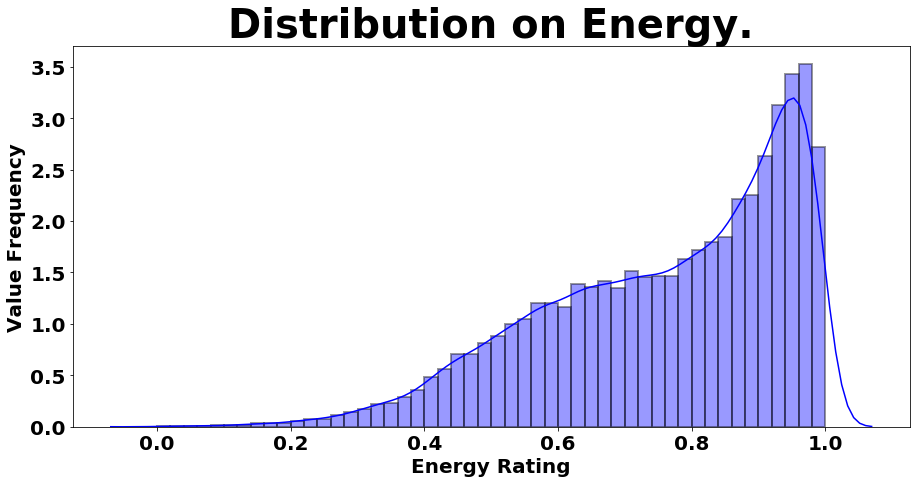

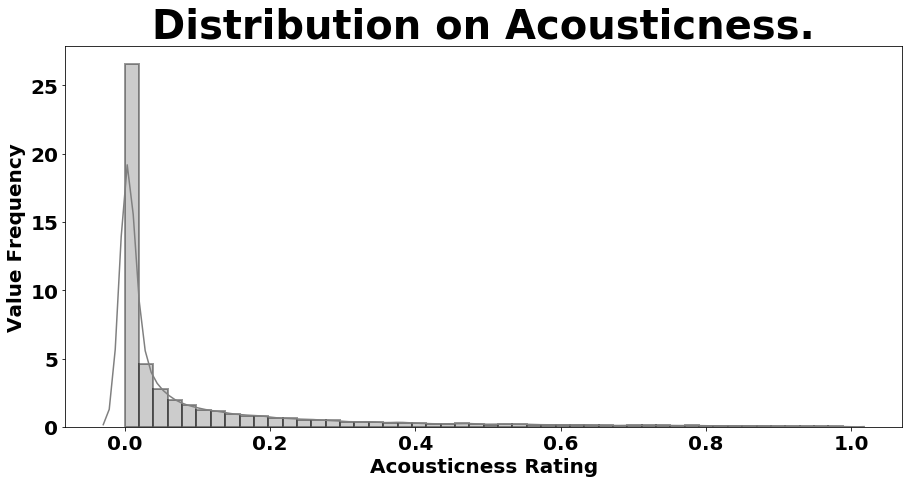

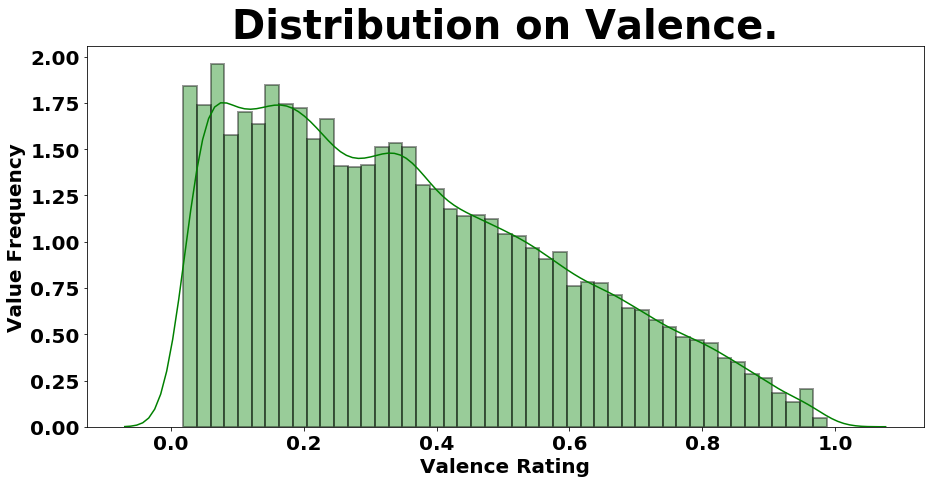

In [11]:
e = 0
for i in audio_feature_list:
    plt.figure(figsize = (15,7))
    plt.title(f'Distribution on {i.title()}.', size = 40, weight = 'bold')
    sns.distplot(g_df[i], color = audio_feature_color_list[e], kde = True, hist_kws=dict(edgecolor="black", linewidth=2))
    plt.xticks(size = 20, weight = 'bold')
    plt.yticks(size = 20, weight = 'bold')
    plt.xlabel(f'{audio_feature_list[e].title()} Rating', size = 20, weight = 'bold')
    plt.ylabel("Value Frequency", size = 20, weight = 'bold')
    e += 1

__The following are violin plots, that display the density and frequency distribution per the genre, and split by the mode. The median and interquartile ranges are also dispayed.__

__The mode indicates the type of scale of the song - whether minor or major based.__

__0.0 is minor based, and 1.0 is major based__

__Loudness of the track is measured in decibels (dB). It indicates how well a track carries a bold and intense sound.__

__The audio feature Key, is the estimated value of the overall Key of the song. Range is from 0 - 11.__

__0 = C__

__1 = C#__

__2 = D__

__3 = D#__

__4 = E__

__5 = F__

__6 = F#__

__7 = G__

__8 = G#__

__9 = A__

__10 = A#__

__11 = B__

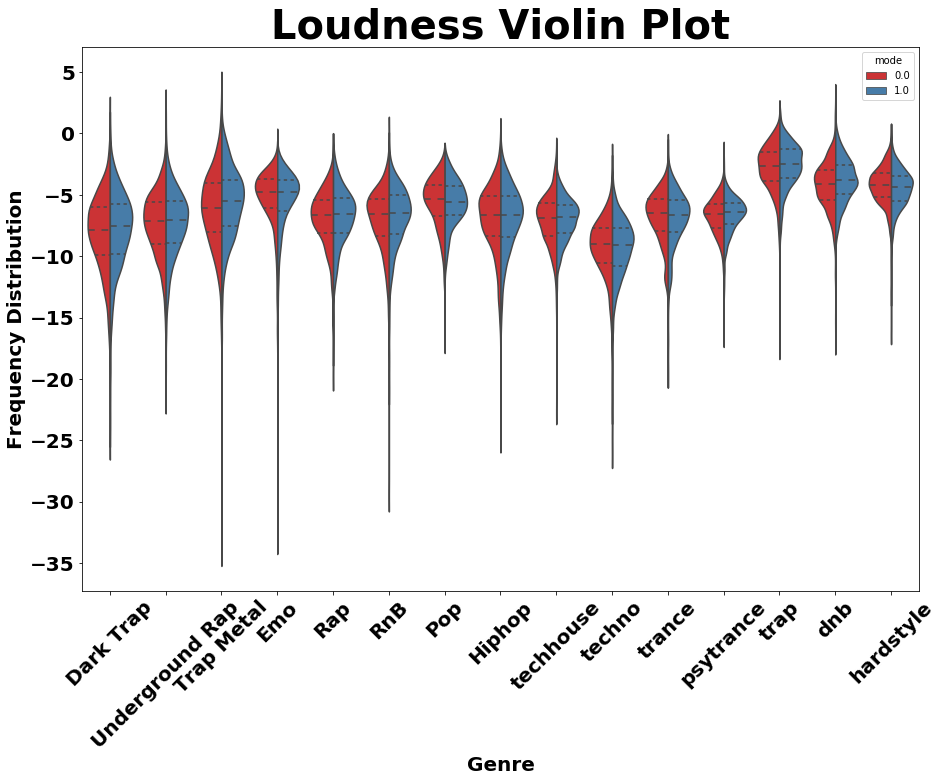

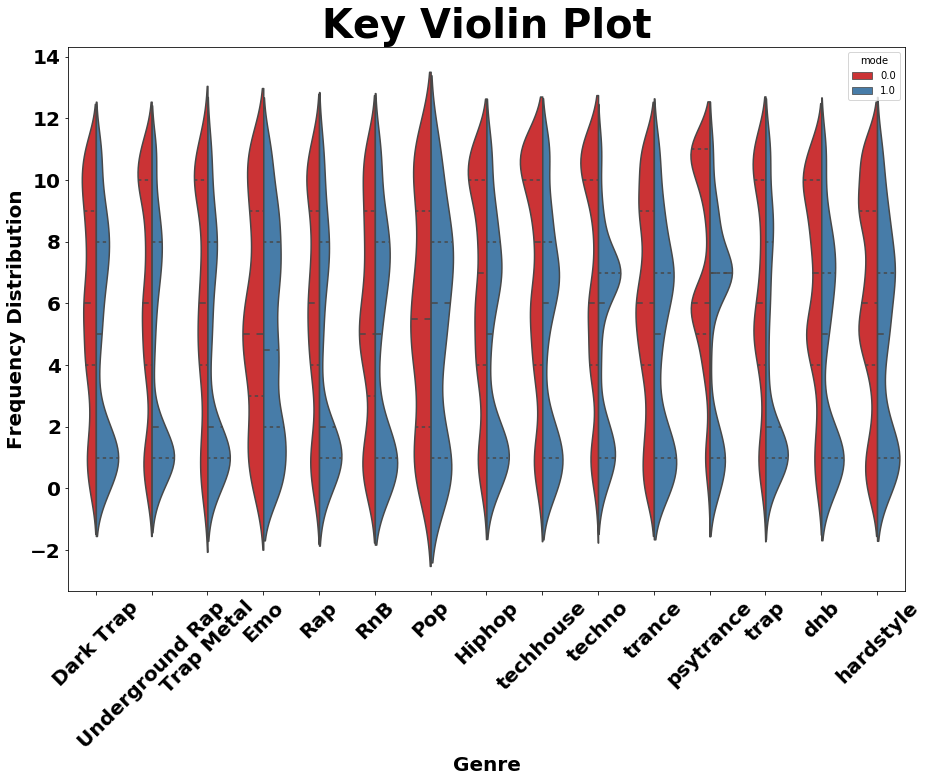

In [12]:
for i in lk_values:
    plt.figure(figsize = (15,10))
    sns.violinplot(data = lk_df.where(lk_df['variable'] == i), x = 'genre', y = 'value', split = True, hue = 'mode', inner='quartile', palette = 'Set1')
    plt.title(f'{i.title()} Violin Plot', size = 40, weight = 'bold')
    plt.xticks(rotation = 45, weight = 'bold', size = 20)
    plt.yticks(size = 20, weight = 'bold')
    plt.xlabel('Genre', size = 20, weight = 'bold')
    plt.ylabel('Frequency Distribution', size = 20, weight = 'bold')

__The following are box plots that display the ratings of various audio features that range from 0.0 to 1.0, for the genres Pop, Trance and Underground Rap.__

__The outliers within the box plots, indicate the instances that appeared with this feature, but isn't within the norm.__

__Values that appear within the quartile ranges, indicate instances which are statistically considered the norm.__

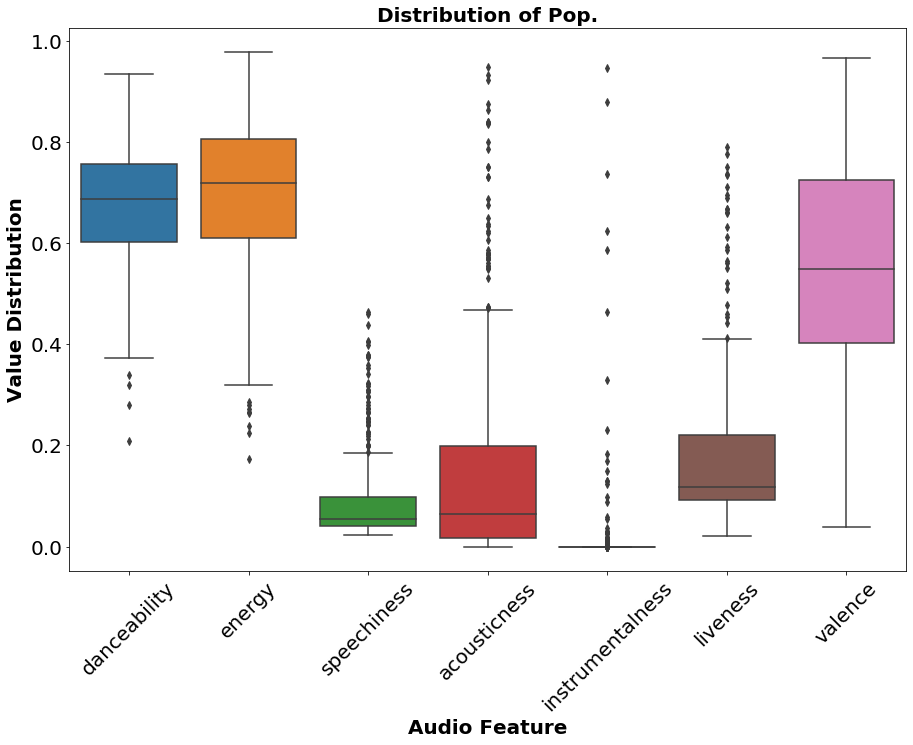

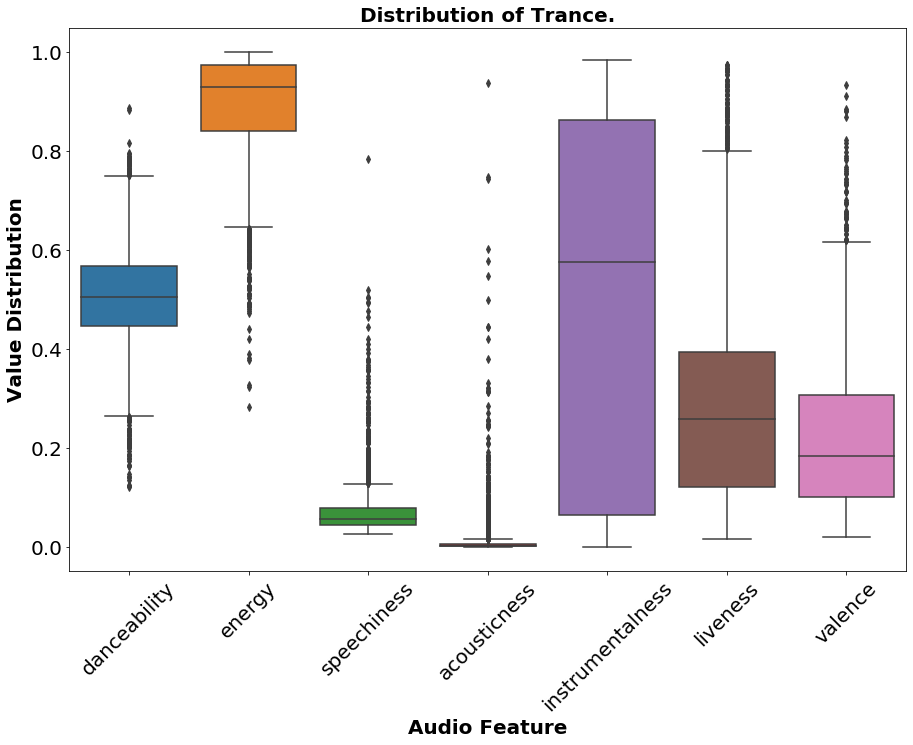

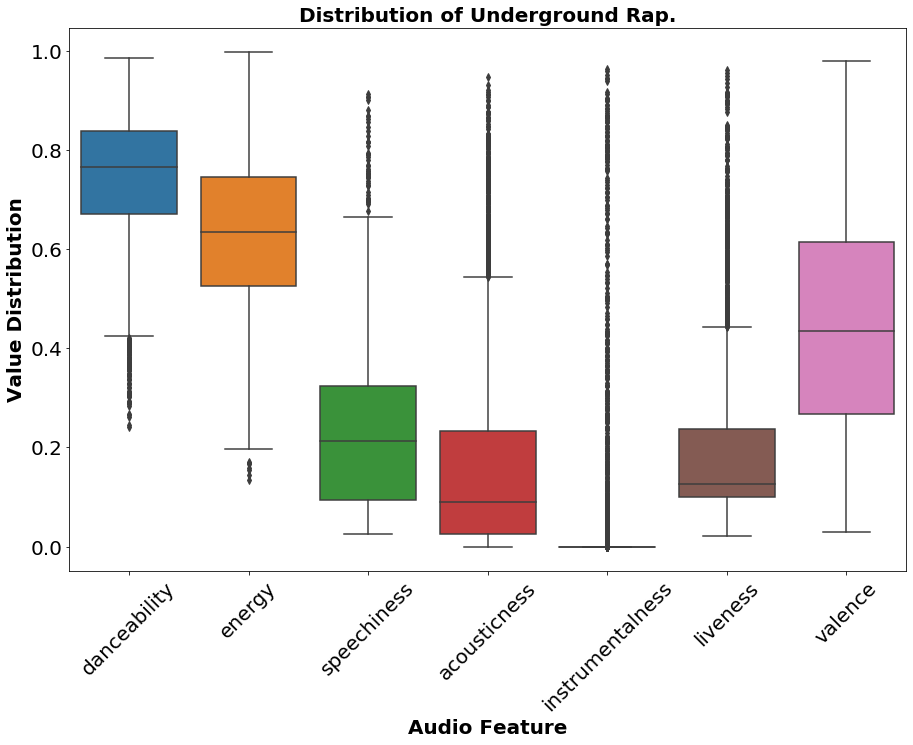

In [13]:
for i in genre_list:
    plt.figure(figsize = (15,10))
    sns.boxplot(data = genre_group.where(genre_group['genre'] == i), x = 'variable', y = 'value')
    plt.title(f'Distribution of {i.title()}.', size = 20, weight = 'bold')
    plt.ylabel('Value Distribution', size = 20, weight = 'bold')
    plt.xlabel('Audio Feature', size = 20, weight = 'bold')
    plt.tick_params(axis = 'x', labelsize = 20, rotation = 45)
    plt.tick_params(axis = 'y', labelsize = 20)